<h2 align='center' style="color:red"> Banking marketing data exploration and prediction of the customer subcribe to term deposit </h2>

<p> in this notebook we are going to look the problem of predicting the potential customer who can subscribe to term deposite of given bank </p>
<h3> as usal we will start by loading the given datset, let's import some necessary library </h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import time
start = time.time()

<p> we have imported matplotlib and seaborn for visulization purpose and sklearn.model_selection we will use this later in tests train split. </p>

In [2]:
data = pd.read_csv('E:/CMI project/bank-data/bank.csv', sep = ';')

In [3]:
data.head() ## geting the dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.isnull().values.any()

False

this dataset don't have any null value

<h3> it is a good idea to make a list of numerical and catogerical variable </h3>

In [5]:
cols = data.columns
num_cols = list(data._get_numeric_data().columns)
cat_col = list(set(cols) - set(num_cols) - set('y')) ## catogerical data
cat_col

['month',
 'poutcome',
 'day_of_week',
 'contact',
 'loan',
 'job',
 'housing',
 'education',
 'default',
 'marital']

<h3> in our data set there are some unknown value:</h3>
<p> we can either delete the unknown value or could take them as other class </P>

In [6]:
cat_miss=[]
for i in cat_col:
    if "unknown" in data[i].unique():
        cat_miss.append(i)
cat_miss ## catogerical variable with unknown value

['loan', 'job', 'housing', 'education', 'default', 'marital']

In [7]:
data.shape

(41188, 21)

In [8]:
data2 = data.loc[(data['education']!='unknown')&(data['marital']!='unknown"')&(data['housing']!='unknown')
                        &(data['job']!='unknown')&(data['loan']!='unknown')]  ## removing the unknown value

In [9]:
data2.shape

(38311, 21)

After removing the unknown value our total dataset get changed to 38311 from 41188. that's a significant change so we will keep the orginal data considering unknown as other class

In [10]:
data2=data

In [11]:
data2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h3> from the above analysis we can see that there is no any outliers in our dataset </h3>

In [12]:
scalers=['age', 'duration', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# for i in scalers:
#     data2[i] = (data2[i]-data2[i].min())/(data2[i].max()-data2[i].min())

In [15]:
# data2.describe()

<h3> we are going to split the feuture variable and target variable</h3>

In [16]:
X = data2.iloc[:, 0:20]
y = data2.iloc[:, 20]   ## spliting feuture and target variable

<h3> our data set has catogerical variable with different catogery, so we need to do one hot encoding before making any classificatin model</h3>

In [17]:
X_encoded=pd.get_dummies(X, drop_first=True) ## doing the one hot encoding of the variable

In [18]:
X_encoded.shape, y.shape

((41188, 53), (41188,))

In [19]:
col=list(X_encoded.columns)
col

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

<h3> as we can see after doing one hot encoding total no of column increased to 53 from 21 </h3>

# Test Train Split

<h3> before doing any further exploration let's split the dataset in test and train datset so that we could test our model on original dataset without making any change that we may possibly going to make in train dataset. hence it's advisable to split the dataset before making any further exploration and change</h3>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42) ## doing test train split 

In [21]:
X_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,...,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.017420,257.746313,2.572959,962.745341,0.172989,0.083105,93.576835,-40.514574,3.622698,5167.094049,...,0.331866,0.100577,0.017420,0.013900,0.206161,0.208558,0.197663,0.197360,0.863035,0.033080
std,10.435842,259.459863,2.778138,186.248245,0.492992,1.570011,0.579157,4.622683,1.733735,72.354625,...,0.470890,0.300772,0.130833,0.117077,0.404553,0.406284,0.398243,0.398012,0.343816,0.178849
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ploting Catogerical Variable


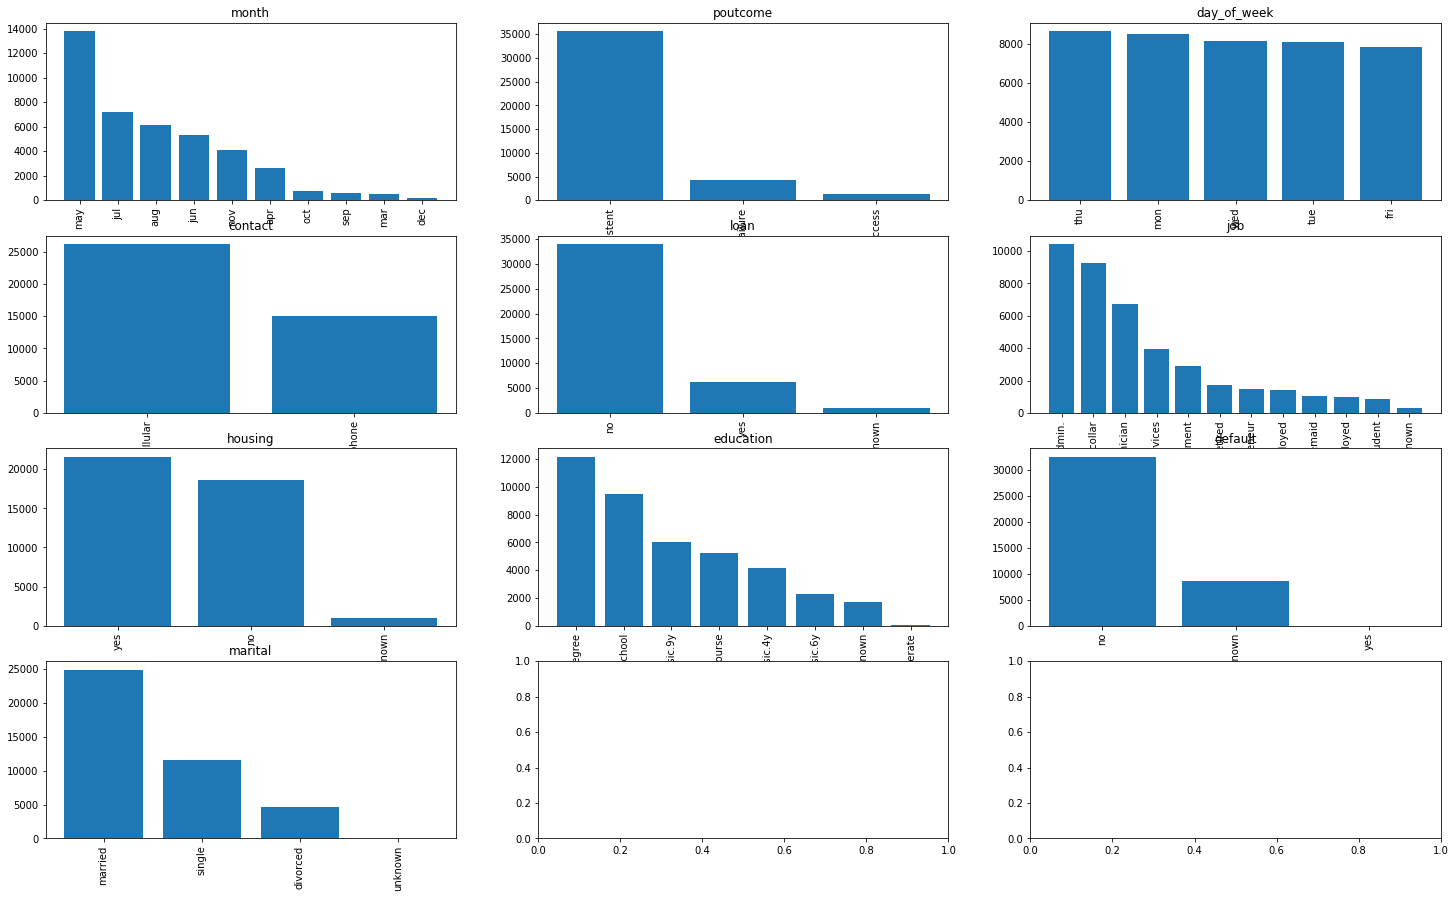

In [76]:
fig , axis = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(25, 15))

flag = 0

for i in cat_col:
    value_counts = data2[i].value_counts()
    trace_x = flag // 3
    trace_y = flag % 3
    x_pos = np.arange(0, len(value_counts))
    
    axis[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axis[trace_x, trace_y].set_title(i)
    
    for tick in axis[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    flag += 1

plt.show()

# Ploting numerical Variable

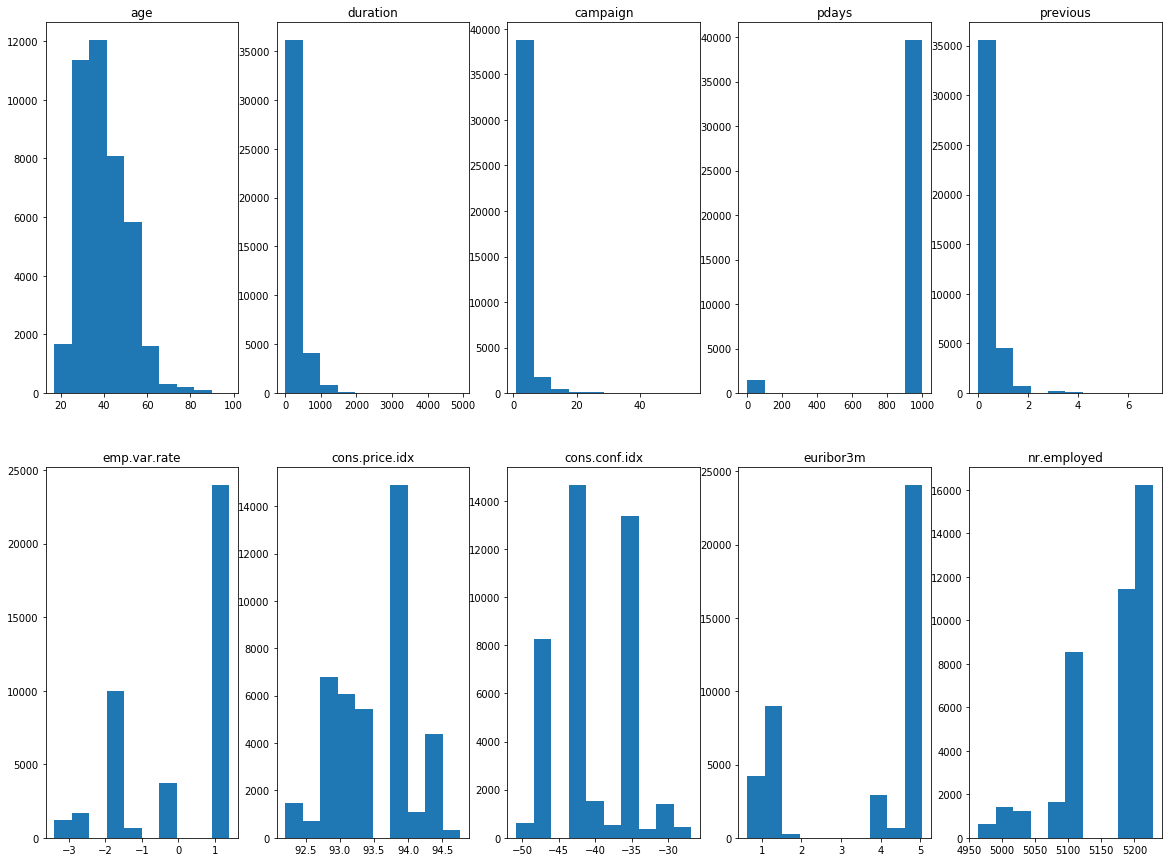

In [23]:
fig , axis = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(20, 15))

flag = 0

for i in num_cols:
    
    trace_x = flag // 5
    trace_y = flag % 5
    
    axis[trace_x, trace_y].hist(data2[i])

    axis[trace_x, trace_y].set_title(i)
    
    
    flag += 1

plt.show()

# checking Imblance of the dataset

<h3> before fitting any model we are going to check if our dataset is balance or not i.e. if the no of yes and no value in our target variable is either equal or not </h3> 

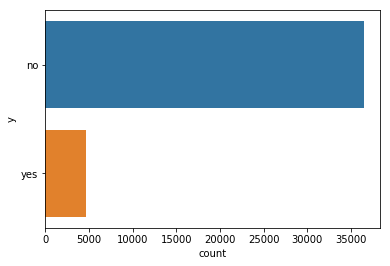

In [24]:
sns.countplot(y = 'y', data = data2)

### Dataset is highly imbalance

<h4> we can see the no of yes value is very less than the no of No value. this is highly imblance dataset. as the no of No value is greater our model will become more baised toward no value and it will predict more customer as they are not potentail subcriber of their term. and that will not be good for our marketing startegy for bank </h4>

In [25]:
yes= data2[data2['y']=='yes']
no= data2[data2['y']=='no']

In [26]:
yes.shape, no.shape

((4640, 21), (36548, 21))

<h3> Handeling the imbalance datset </h3>

<h2><p> i use 2 method for handeling imnbalance dataset: </p></h2>
    <h3><p> 1) random undersampling i.e. removing the no value form the dataset in order to balance the data </p></h3>
    <h3><p> 2) SMOTE smote synthetic i.e. adding more synthetic data of minor class i.e. 'yes' to balance the data </p></h3>

<h3> advantage and disadvantage of both method: </h3>
1) in case of random undersampling as it remove the datset with no value randomly i.e. it reduce the dataset so our model comperise with overall accuracy of the model but as it will balance the data from the subset of original data it will give much better recall value of minor class
2) in case of SMOTE synthetic it add synthetic data means it increase the dataset which is good for model but it will give less recall value of minor class


<h3> we fit model with both type of sampling </h3>

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [28]:
nms = RandomUnderSampler()
X_res,y_res=nms.fit_resample(X_train, y_train) ## balance dataset with the undersampling

In [29]:
smt=SMOTE()
X_res1,y_res1=smt.fit_resample(X_train,y_train) ## balance dataset with the oversamplign with somte technique

In [30]:
Counter(y_res1)

Counter({'no': 29245, 'yes': 29245})

In [31]:
Counter(y_res)

Counter({'no': 3705, 'yes': 3705})

# <h1 align='center'> Making Model </h1>

# <i> 1) Descision Tree </i>

In [32]:
start = time.time()

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [34]:
## need to use one hot encoding for decision tree

In [35]:
clf= tree.DecisionTreeClassifier()
clf2=clf.fit(X_res, y_res)   ## decision tree on undersample datset

In [36]:
clfn= tree.DecisionTreeClassifier()
clfs=clfn.fit(X_res1, y_res1)  ## decision tree on the oversample datset

In [37]:
y_test_predicts=clfs.predict(X_test) ## predicting the value of oversample model

In [38]:
y_test_predict=clf2.predict(X_test) ## predicting the value of undersample model

In [39]:
end = time.time()
print("Total time taken:",(end - start),"seconds")

Total time taken: 2.28371000289917 seconds


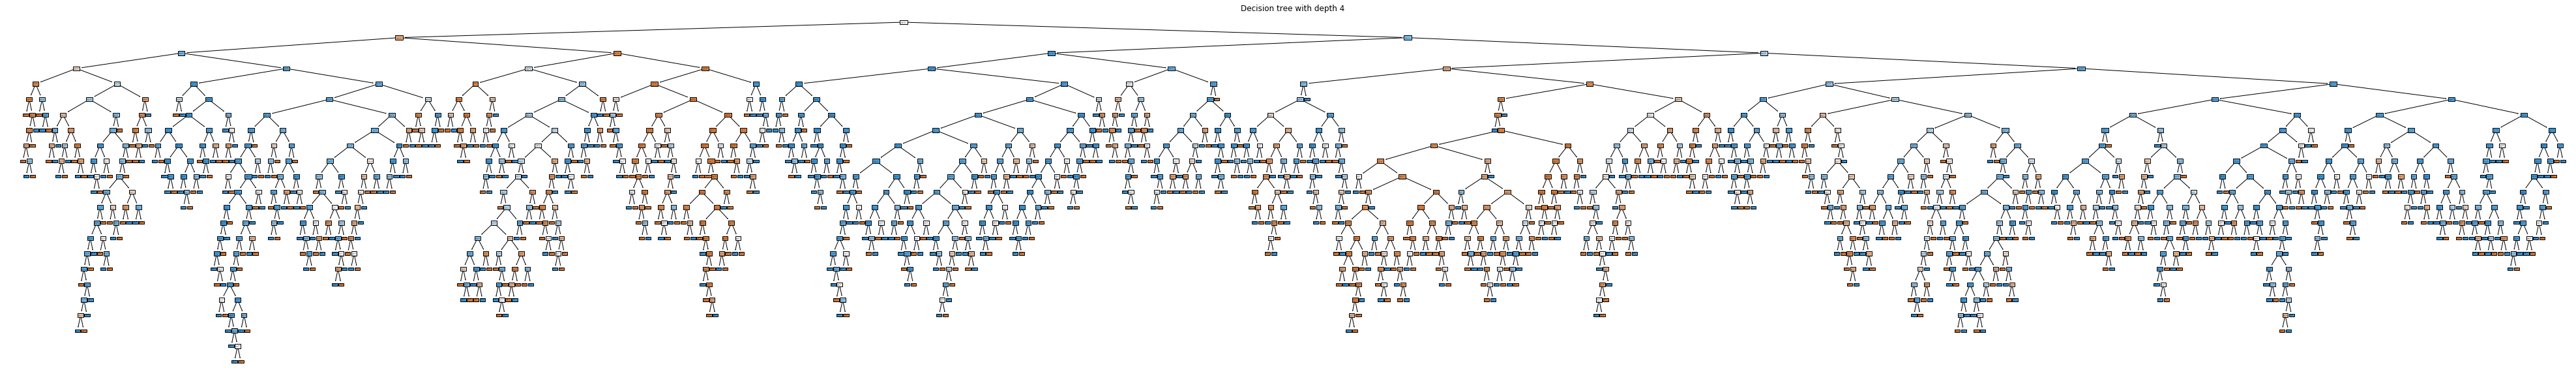

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize=(70,10))

plot_tree(clf2, filled=True)
plt.title("Decision tree with depth 4")
plt.show()                                 ## ploting the decision tree 

In [41]:
pred= pd.DataFrame()
pred['actual']=y_test
pred['pred']=y_test_predicts
pred.head()       ## for oversample model with smote technique

,actual,pred
32884,no,yes
3169,no,no
32206,no,no
9403,no,no
14020,no,no


In [42]:
pred= pd.DataFrame()
pred['actual']=y_test
pred['pred']=y_test_predict
pred.head()    ## for undersample model

,actual,pred
32884,no,no
3169,no,no
32206,no,no
9403,no,no
14020,no,no


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Accuracy Score

In [44]:
accuracy_score(y_test, y_test_predict)  ## undersample model accuracy score

0.8377033260500122

In [45]:
accuracy_score(y_test, y_test_predicts) ## smote model accuracy score 

0.8854090798737557

In [46]:
target_names=['no', 'yes']

In [47]:
print(classification_report(y_test, y_test_predict, target_names=target_names)) ## classification report for undersample model

              precision    recall  f1-score   support

          no       0.97      0.84      0.90      7303
         yes       0.40      0.83      0.54       935

    accuracy                           0.84      8238
   macro avg       0.69      0.83      0.72      8238
weighted avg       0.91      0.84      0.86      8238



In [48]:
print(classification_report(y_test, y_test_predicts, target_names=target_names)) ## classification report for smote model

              precision    recall  f1-score   support

          no       0.94      0.93      0.93      7303
         yes       0.50      0.57      0.53       935

    accuracy                           0.89      8238
   macro avg       0.72      0.75      0.73      8238
weighted avg       0.89      0.89      0.89      8238



# Confusion Matrix

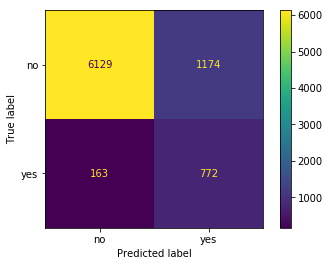

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(
   y_test, y_test_predict)

plt.show()   ## for undersample model

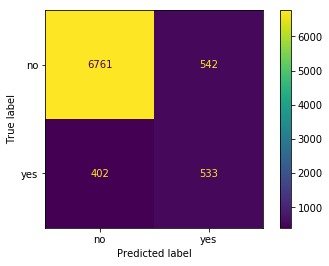

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(
   y_test, y_test_predicts)

plt.show()       ## for smote model

# Random Forest

In [51]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier

### for checking the optimum value of max_depth we try to fit the model with different value of max_deapth and realised that after a certain optimum number there was no any improvement on performence matrix

In [52]:
clf3=RandomForestClassifier(max_depth=30, random_state=30) ## Random forest on the undersample model
clf3=clf3.fit(X_res, y_res)
y_test_rpredict=clf3.predict(X_test)
predr= pd.DataFrame()
predr['actual']=y_test
predr['pred']=y_test_rpredict
predr.head()            

,actual,pred
32884,no,no
3169,no,no
32206,no,no
9403,no,no
14020,no,no


In [53]:
accuracy_score(y_test, y_test_rpredict) ## accuracy score for undersample model

0.8528769118718136

In [54]:
clf3=RandomForestClassifier(max_depth=22, random_state=30) ##Random forest for smote sample model
clf3=clf3.fit(X_res1, y_res1)
y_test_rpredicts=clf3.predict(X_test)
predr= pd.DataFrame()
predr['actual']=y_test
predr['pred']=y_test_rpredicts
predr.head()

,actual,pred
32884,no,no
3169,no,no
32206,no,no
9403,no,no
14020,no,no


In [55]:
end = time.time()                                     ## time taken by random forest model
print("Total time taken:",(end - start),"seconds")

Total time taken: 11.518610715866089 seconds


In [56]:
accuracy_score(y_test, y_test_rpredicts)     ## accuracy score of random forest model with smote sampling

0.9079873755765963

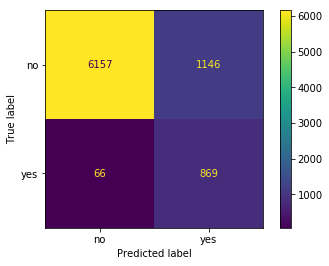

In [57]:

ConfusionMatrixDisplay.from_predictions(
   y_test, y_test_rpredict)
plt.show()                                       ## confusion matrix of Random forest with undersampling   

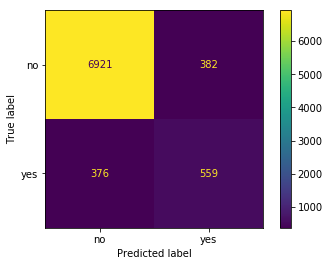

In [58]:

ConfusionMatrixDisplay.from_predictions(
   y_test, y_test_rpredicts)

plt.show()     ## confusion matrix of random forest with smote model

In [59]:
print(classification_report(y_test, y_test_rpredict, target_names=target_names))   ## classification report of undersampling 

              precision    recall  f1-score   support

          no       0.99      0.84      0.91      7303
         yes       0.43      0.93      0.59       935

    accuracy                           0.85      8238
   macro avg       0.71      0.89      0.75      8238
weighted avg       0.93      0.85      0.87      8238



In [60]:
print(classification_report(y_test, y_test_rpredicts, target_names=target_names)) ## classifiaction report for smote model

              precision    recall  f1-score   support

          no       0.95      0.95      0.95      7303
         yes       0.59      0.60      0.60       935

    accuracy                           0.91      8238
   macro avg       0.77      0.77      0.77      8238
weighted avg       0.91      0.91      0.91      8238



# Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
start=time.time()

In [62]:
gnb = GaussianNB()                  ## naive bayes with undersampling model
gnb=gnb.fit(X_res, y_res)
y_test_gpredict=gnb.predict(X_test)
predg= pd.DataFrame()
predg['actual']=y_test
predg['pred']=y_test_gpredict
predg.head()

,actual,pred
32884,no,no
3169,no,no
32206,no,no
9403,no,no
14020,no,no


In [63]:
end = time.time()
print("Total time taken:",(end - start),"seconds")

Total time taken: 0.220841646194458 seconds


In [64]:
accuracy_score(y_test, y_test_gpredict)

0.8652585579024035

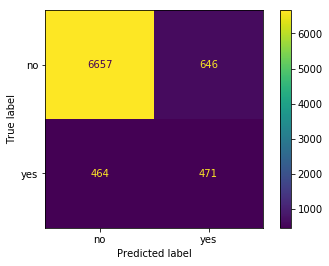

In [65]:
ConfusionMatrixDisplay.from_predictions(
   y_test, y_test_gpredict)

plt.show()                                             ## confusion matrix plot of naive bayes

In [66]:
print(classification_report(y_test, y_test_gpredict, target_names=target_names))

              precision    recall  f1-score   support

          no       0.93      0.91      0.92      7303
         yes       0.42      0.50      0.46       935

    accuracy                           0.87      8238
   macro avg       0.68      0.71      0.69      8238
weighted avg       0.88      0.87      0.87      8238



In [67]:
final_accuracy=pd.DataFrame()
naiveBayes =[0.8542]
Decission_tree=[0.88]
randomforest=[0.902]

In [68]:
final_accuracy['naiveBayes']=naiveBayes
final_accuracy['Decission Tree']=Decission_tree
final_accuracy['Randon Forest']=randomforest
final_accuracy


,naiveBayes,Decission Tree,Randon Forest
0,0.8542,0.88,0.902


<H1> CONCLUSION: </H1> <H3> random forest perform better then any other model, we make the imbalnce datset balance by two method : <p>
1) undersampling: in undersampling we make the datset by undersample the whole sample i.e. reducing the datset. when we fit the model in undersampled datset. our accuracy was 0.85 in random forest.</p> 
    <p> 2) SMOTE: in this method we balance the dataset by oversampling. i.e. it increse the no of row in datset. when fit the model with this method our accuracy was about 0.902.  </p> 
<p> other then accuarcy our main target was to increase the recall value of yes. from our performance matrix we see that recall of yes is much better in case of model with undersample data of random forest</p></H3>

# Cross validation

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [70]:
kfold_val=KFold(10)
nms = RandomUnderSampler()
X_cross,y_cross=nms.fit_resample(X_encoded, y)

In [71]:
clfr=RandomForestClassifier(max_depth=25) ##smote

In [72]:
result=cross_val_score(clfr,X_res1,y_res1,cv=kfold_val)

KeyboardInterrupt: 

In [ ]:
print(result)
print('mean Score: '+ str(np.mean(result)))

In [ ]:
end = time.time()
print("Total time taken:",(end - start),"seconds")